<h1> Python for data science </h1>
<h2> Devoir Maison - Lucile Jeanneret </h2>

Data set containing values for 41 attributes (molecular descriptors) used to classify 1055 chemicals into 2 classes (ready and not ready biodegradable).



In [14]:
import pandas as pd
import os
import csv
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np


<h2> Créer un script python qui automatise toute la procédure de modélisation de la base
de données : </h2>

<h3>Data-visualisation des données (via matplotlib, seaborn ou bokeh …) <br>
Data-préparation (pandas)</h3> 

In [15]:
#soup = BeautifulSoup (open("D:\ESILV\Annee 5\python\biodeg.csv"))

In [16]:
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00254/biodeg.csv'
names = ['1) SpMax_L','2) J_Dz(e)','3) nHM','4) F01[N-N]', 
'5) F04[C-N]', 
'6) NssssC', 
'7) nCb-',
'8) C%', 
'9) nCp', 
'10) nO',
'11) F03[C-N]', 
'12) SdssC', 
'13) HyWi_B(m)', 
'14) LOC', 
'15) SM6_L', 
'16) F03[C-O]', 
'17) Me',
'18) Mi', 
'19) nN-N', 
'20) nArNO2', 
'21) nCRX3', 
'22) SpPosA_B(p)', 
'23) nCIR', 
'24) B01[C-Br]',
'25) B03[C-Cl]',
'26) N-073',
'27) SpMax_A',
'28) Psi_i_1d', 
'29) B04[C-Br]',
'30) SdO',
'31) TI2_L', 
'32) nCrt',
'33) C-026',
'34) F02[C-N]',
'35) nHDon' ,
'36) SpMax_B(m)',
'37) Psi_i_A',
'38) nN',
'39) SM6_B(m)', 
'40) nArCOOR',
'41) nX',
'experimental_class']
df = pd.read_csv(filename,sep=";",names = names,index_col=False)
df

,1) SpMax_L,2) J_Dz(e),3) nHM,4) F01[N-N],5) F04[C-N],6) NssssC,7) nCb-,8) C%,9) nCp,10) nO,...,33) C-026,34) F02[C-N],35) nHDon,36) SpMax_B(m),37) Psi_i_A,38) nN,39) SM6_B(m),40) nArCOOR,41) nX,experimental_class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB
5,4.236,3.4286,0,0,0,0,0,28.6,2,4,...,0,0,0,3.351,2.556,0,7.904,0,0,RB
6,5.000,5.0476,1,0,0,0,0,11.1,0,3,...,0,0,1,4.712,4.583,0,9.303,0,0,RB
7,4.525,3.8301,0,0,0,0,0,31.6,3,2,...,0,0,0,3.379,2.143,0,7.950,0,0,RB
8,4.596,3.0777,0,0,0,0,2,44.4,2,0,...,0,0,0,3.626,1.917,0,7.939,0,0,RB
9,5.040,3.6112,0,0,1,0,2,41.2,0,4,...,1,2,1,3.888,3.500,1,8.706,0,0,RB


<h3> Data-visualisation des données (via matplotlib, seaborn ou bokeh …) </h3>

<p> Ready Biodeg (rb) VS Non Ready Biodeg (nrb)</p>

In [24]:
rb = df.experimental_class == "RB"
nrb = df.experimental_class == "NRB"

In [26]:
nb_rb=df[rb]["experimental_class"].count()
nb_nrb=df[nrb]["experimental_class"].count()

In [59]:
nb_rb

356

In [27]:
nb_nrb

699

<p> Compter la moyenne de C% sur l'ensemble du dataframe </p 

In [28]:
df["8) C%"].mean()

37.05563981042661

<p> Pour les Ready Biodeg</p>

In [29]:
df[rb]["8) C%"].mean()

34.473595505617965

<p> Pour les non ready bio deg : </p>

In [30]:
df[nrb]["8) C%"].mean()

38.37067238912733

In [37]:
df.groupby(["experimental_class"])["8) C%"].mean()


experimental_class
NRB    38.370672
RB     34.473596
Name: 8) C%, dtype: float64

In [38]:
df.groupby(["experimental_class"])["36) SpMax_B(m)"].mean()

experimental_class
NRB    4.124747
RB     3.512767
Name: 36) SpMax_B(m), dtype: float64

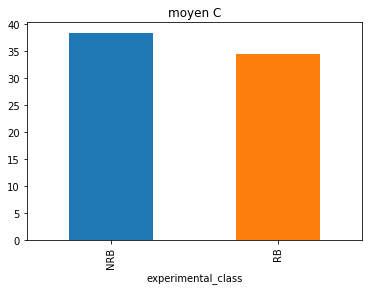

In [39]:
%matplotlib inline 
df.groupby(["experimental_class"])["8) C%"].mean().plot.bar(title="moyen C")

<h2> Calculer et afficher, le min, max et mean par majorite </h2>

In [40]:
grouped = df.groupby(["experimental_class"])["8) C%"]

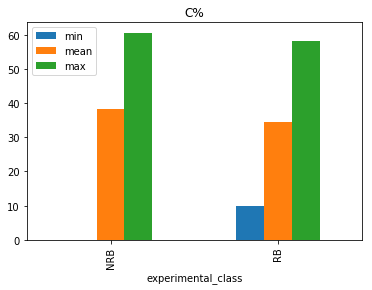

In [43]:
grouped.agg(["min", "mean",  "max"]).plot.bar(title="C%")

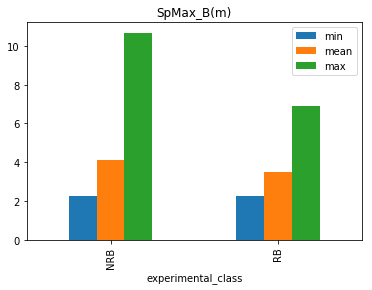

In [45]:
grouped2 = df.groupby(["experimental_class"])["36) SpMax_B(m)"]
grouped2.agg(["min", "mean",  "max"]).plot.bar(title = "SpMax_B(m)")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A552C6DCC0>],
      dtype=object)

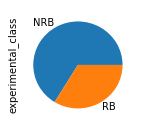

In [46]:
# Nouvelle figure
largeur_figure = 2
hauteur_figure = 2
plt.figure(figsize=(largeur_figure, hauteur_figure))
# calcul d
nb_rb_by_C = df["experimental_class"].value_counts()
nb_rb_by_C.plot.pie(subplots=True)

In [62]:
mask_rb = df["experimental_class"]=="rb"
mask_nrb= df["experimental_class"]=="nrb"
#ax = df[mask_rb].plot.scatter(x="8) C%", y="36) SpMax_B(m)", color="violet")

ax=df[mask_rb].plot.scatter(x="8) C%", y="36) SpMax_B(m)", color="violet")
df[mask_nrb].plot.scatter(x="8) C%", y="36) SpMax_B(m)", color="blue", ax=ax)

ValueError: scatter requires x column to be numeric

KeyError: 'exprimental_class'

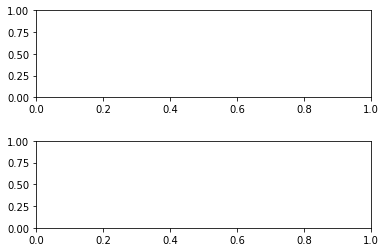

In [63]:
fig, axes = plt.subplots(2,1)
# Rajouter de l'espace entre les deux dessins
fig.subplots_adjust(hspace=0.5)

settings_rb = ("RB", "violet", axes[0])
settings_nrb = ("NRB", "blue"  , axes[1])

for exp_class, color, ax in [settings_rb, settings_nrb]:
    mask                 = df["exprimental_class"]==exp_class
    data                 = df[mask]
    sportivite_moyenne   = data.groupby("8) C%")["36) SpMax_B(m)"].mean()
    std_sportivite       = data.groupby("8) C%")["36) SpMax_B(m)"].std()
    borne_inferieure     = sportivite_moyenne - std_sportivite
    borne_superieure     = sportivite_moyenne + std_sportivite
    data.plot.scatter(x="8) C%", y="36) SpMax_B(m)", color=color, ax=ax)
    sportivite_moyenne.plot.line(c=color, alpha=0.5, ax=ax)
    ax.fill_between(sportivite_moyenne_f.index, borne_inferieure, borne_superieure,color=color, alpha=0.2 )
    ax.set_title(exp_class)

# Modélisation (scikit learn)

<h2> separer le jeu d'apprentissage du jeu de test </h2>

In [66]:
from sklearn.cross_validation import train_test_split

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [74]:
y = df["experimental_class"]

df.drop(['experimental_class'], axis='columns', inplace=True)

In [77]:
X = df 

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

<h2> standardiser les valeurs </h2>

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  

<h2> Algo </h2>

In [82]:
from sklearn import svm
algorithme = svm.SVC()
algorithme.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [83]:
from sklearn import cross_validation
cross_validation.cross_val_score(algorithme, X, y, n_jobs=-1)

array([0.88352273, 0.82954545, 0.80626781])

# Optimisation des hp

In [85]:
from sklearn import grid_search


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [90]:
parameters = {  'gamma' : [0.01, 0.1, 0.5]           ,
                 "probability" : [True]}
grid       = grid_search.GridSearchCV(algorithme, parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_.score(X_test, y_test))

0.8696883852691218 0.8595988538681948


<h2> Affinage </h2> 

In [92]:
parameters = {  'C'      : [0.5, 1, 1.5]             ,
                'gamma'  : [0.5, 0.1, 0.15]      }
grid = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_)

0.8725212464589235 SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [93]:
parameters = {  'C'       : [2.5, 3, 4]   ,
                'kernel'  : ['rbf', 'poly', 'sigmoid'],
                'gamma'   : [ 0.01, 0.05, 0.07],
                 "degree" : [1,3,5]}
grid = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_)


0.8725212464589235 SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=0.07, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
